In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
prod = pd.read_csv('data/products.csv')
ord_itm = pd.read_csv('data/order_items.csv')

In [104]:
prod.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [105]:
ord_itm.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [106]:
len(prod)

32951

In [107]:
len(ord_itm)

112650

In [108]:
ord_itm.groupby('product_id')['product_id'].value_counts()

product_id
00066f42aeeb9f3007548bb9d3f33c38    1
00088930e925c41fd95ebfe695fd2655    1
0009406fd7479715e4bef61dd91f2462    1
000b8f95fcb9e0096488278317764d19    2
000d9be29b5207b54e86aa1b1ac54872    1
                                   ..
fff6177642830a9a94a0f2cba5e476d1    2
fff81cc3158d2725c0655ab9ba0f712c    1
fff9553ac224cec9d15d49f5a263411f    1
fffdb2d0ec8d6a61f0a0a0db3f25b441    5
fffe9eeff12fcbd74a2f2b007dde0c58    1
Name: count, Length: 32951, dtype: int64

# Create data


Так, як я не дуже добре розумію на що саме ми прогнозуємо попит(це має бути вже лише на доставлені товари чи це має бути на зацікавленість і замовлення), тому я вирішив зробити свій датасет, який буде складатись з 3 цих.

In [109]:
prod = pd.read_csv('data/products.csv')
ord_itm = pd.read_csv('data/order_items.csv')
ord = pd.read_csv('data/orders.csv')

In [110]:
ord.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [111]:
prod.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [112]:
ord_itm.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [113]:
A = pd.merge(ord[['order_id', 'order_purchase_timestamp']], ord_itm[['order_id', 'product_id']],on = 'order_id', how='left')
data = pd.merge(A, prod[['product_id', 'product_category_name']], on = 'product_id', how = 'left')

In [114]:
data = data[['order_id', 'product_id', 'product_category_name', 'order_purchase_timestamp']]

In [115]:
data.head(5)

,order_id,product_id,product_category_name,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,utilidades_domesticas,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,perfumaria,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415,automotivo,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e,papelaria,2018-02-13 21:18:39


In [116]:
data.isna().sum()

order_id                       0
product_id                   775
product_category_name       2378
order_purchase_timestamp       0
dtype: int64

In [117]:
data.dropna(inplace=True)

In [118]:
data.isna().sum()

order_id                    0
product_id                  0
product_category_name       0
order_purchase_timestamp    0
dtype: int64

In [119]:
data

,order_id,product_id,product_category_name,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,utilidades_domesticas,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,perfumaria,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415,automotivo,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e,papelaria,2018-02-13 21:18:39
...,...,...,...,...
113420,63943bddc261676b46f01ca7ac2f7bd8,f1d4ce8c6dd66c47bbaa8c6781c2a923,bebes,2018-02-06 12:58:58
113421,83c1379a015df1e13d02aae0204711ab,b80910977a37536adeddd63663f916ad,eletrodomesticos_2,2017-08-27 14:46:43
113422,11c177c8e97725db2631073c19f07b62,d1c427060a0f73f6b889a5c7c61f2ac4,informatica_acessorios,2018-01-08 21:28:27
113423,11c177c8e97725db2631073c19f07b62,d1c427060a0f73f6b889a5c7c61f2ac4,informatica_acessorios,2018-01-08 21:28:27


In [120]:
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp']).dt.date

In [121]:
data.head(5)

,order_id,product_id,product_category_name,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,utilidades_domesticas,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,perfumaria,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415,automotivo,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0,pet_shop,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e,papelaria,2018-02-13


In [122]:
data_cat = data.groupby(['order_purchase_timestamp', 'product_category_name']).size().reset_index(name='sales')

In [123]:
# data_cat.set_index('order_purchase_timestamp', inplace=True)

<Axes: xlabel='order_purchase_timestamp', ylabel='sales'>

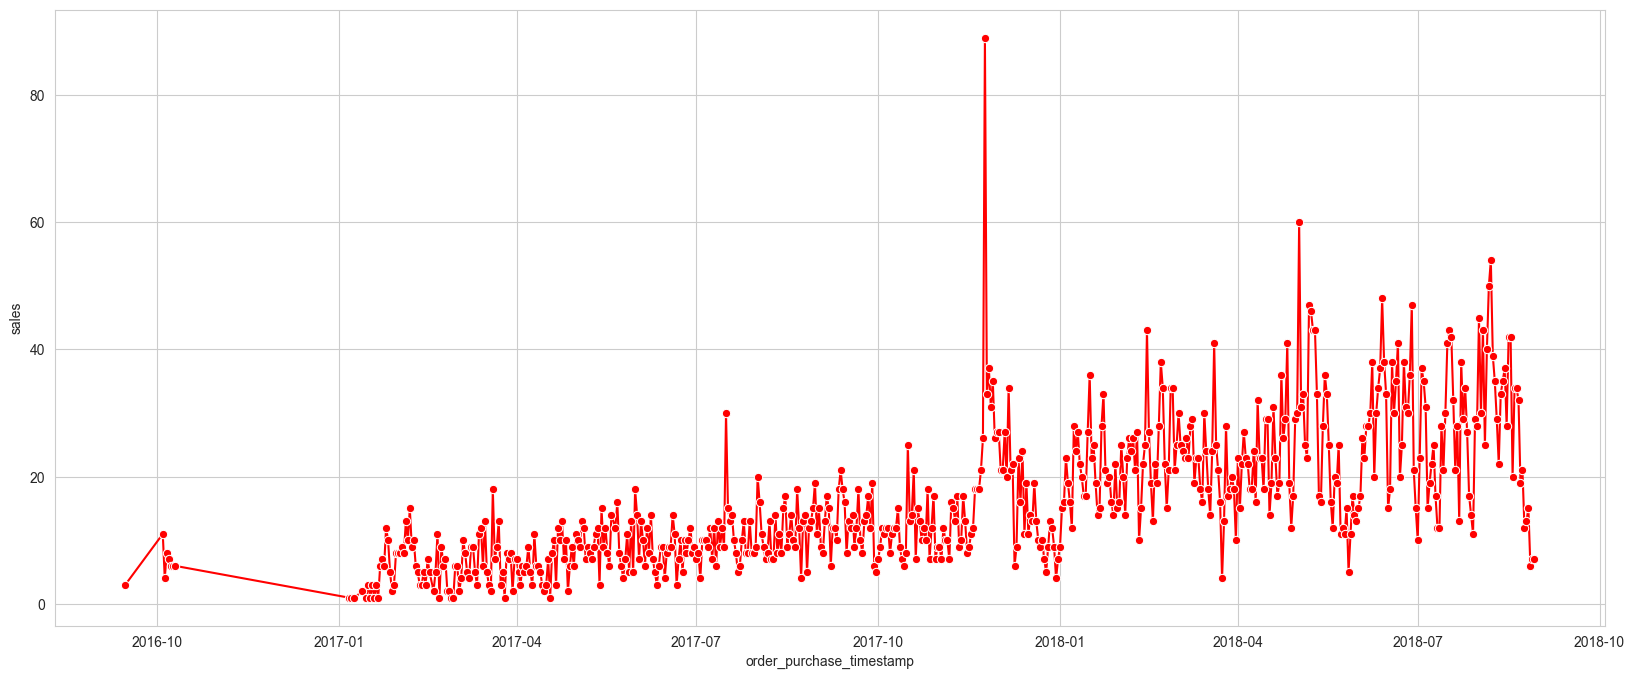

In [124]:
category_data = data_cat[data_cat['product_category_name'] == 'beleza_saude']
plt.figure(figsize=(20, 8))
sns.set_style("whitegrid")
sns.lineplot(data = category_data, x = 'order_purchase_timestamp', y = 'sales', marker='o', color='red')

In [126]:
category_data = data_cat[data_cat['product_category_name'] == 'beleza_saude']
# last_data = data_cat['order_purchase_timestamp'].max()

In [127]:
category_data.set_index('order_purchase_timestamp', inplace=True)

In [128]:
category_data.index

Index([2016-09-15, 2016-10-04, 2016-10-05, 2016-10-06, 2016-10-07, 2016-10-08,
       2016-10-09, 2016-10-10, 2017-01-06, 2017-01-07,
       ...
       2018-08-20, 2018-08-21, 2018-08-22, 2018-08-23, 2018-08-24, 2018-08-25,
       2018-08-26, 2018-08-27, 2018-08-28, 2018-08-29],
      dtype='object', name='order_purchase_timestamp', length=602)

In [129]:
y = category_data['sales']


In [130]:
y.index = pd.to_datetime(y.index)

In [131]:
y.index

DatetimeIndex(['2016-09-15', '2016-10-04', '2016-10-05', '2016-10-06',
               '2016-10-07', '2016-10-08', '2016-10-09', '2016-10-10',
               '2017-01-06', '2017-01-07',
               ...
               '2018-08-20', '2018-08-21', '2018-08-22', '2018-08-23',
               '2018-08-24', '2018-08-25', '2018-08-26', '2018-08-27',
               '2018-08-28', '2018-08-29'],
              dtype='datetime64[ns]', name='order_purchase_timestamp', length=602, freq=None)

In [132]:
import sktime as st
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series

In [133]:
y_train, y_test = temporal_train_test_split(y=y, test_size=0.2)

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='sales'>)

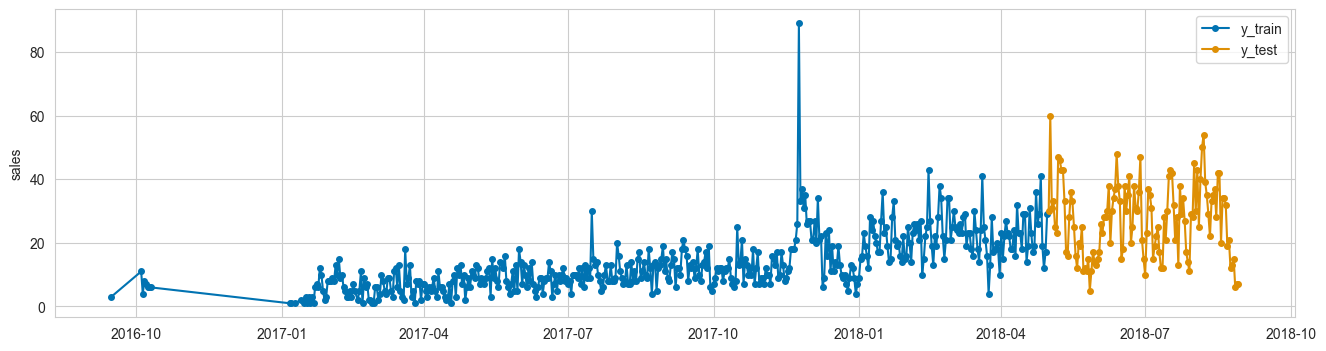

In [144]:
plot_series(y_train, y_test, labels=['y_train', 'y_test'])

In [145]:
last_data = y.index.max()

In [146]:
last_data

Timestamp('2018-08-29 00:00:00')

In [147]:
from sktime.forecasting.base import ForecastingHorizon
# fh = ForecastingHorizon(pd.date_range(start=last_data + pd.Timedelta(days=1), periods=14), is_relative=False)
fh = ForecastingHorizon(y_test.index, is_relative=False)

In [148]:
fh

ForecastingHorizon(['2018-05-01', '2018-05-02', '2018-05-03', '2018-05-04',
               '2018-05-05', '2018-05-06', '2018-05-07', '2018-05-08',
               '2018-05-09', '2018-05-10',
               ...
               '2018-08-20', '2018-08-21', '2018-08-22', '2018-08-23',
               '2018-08-24', '2018-08-25', '2018-08-26', '2018-08-27',
               '2018-08-28', '2018-08-29'],
              dtype='datetime64[ns]', length=121, freq='D', is_relative=False)

In [149]:
from sktime.forecasting.naive import NaiveForecaster

In [150]:
forecaster = NaiveForecaster(strategy='last')
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
# plot_series(y_train, y_test, y_pred)

NullFrequencyError: Cannot shift with no freq

Розповім ідею, що я тут мав зробити, проте у мене не вийшло в силу того, що я не працював з часовими рядами. Отже, сама ідея була взяти категорію, знайти усі її продажі, зробити функцію, яка буде давати predict ряду, який має мати last_day з продаж + 14 днів. І так циклом потім пройти усі категорії(знайючи, що більшість будуть мати predict = 0)

Чому не доробив:  
В силу того, що на тестове і так пішло багато часу, через вивчення часових рядів, мені ще почало давати помилки, які важко було знайти в інтернеті або LLM, щоб дізнатись в чому проблема. Тому я тут успішно згорів, після 4-го дня роботи над цим завданням і вирішив, що просто відправлю Вам свої напрацювання, а Ви вирішуйте чи воно цього варте.

P.S: Звичайно, що якщо я пройду далі і потрібно буде вивчити часові ряди для роботи, то це буде вивчено та я буду з цим працювати. Але зараз стільки пішло нервів на це, що я просто вважаю, що можливо, поки це не раціонально вчити :)